<a href="https://colab.research.google.com/github/Gerlan-Ferreira/Ciencia-de-Dados/blob/Aula-1/Modelo_de_Machine_Learning_para_tratamento_de_verrugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerando modelo de Machine Learning (classificação)
# Domínio: Pessoas com doença de Verrugas e tratamento com Crioterapia.
# Gerlan Ferreira de Barros

In [2]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
#Importação do pacote joblib
import joblib

In [6]:
df_crioterapia_treino = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")

In [7]:
data_treino = np.array(df_crioterapia_treino[['Sexo', 'Idade', 'Tempo', 'Numero_Verrugas', 'Tipo', 'Area']])

data_classif = np.array(df_crioterapia_treino['Resultado_Tratamento'])

In [9]:
def plot_corr(df_crioterapia_treino, size=35):
    corr = df_crioterapia_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

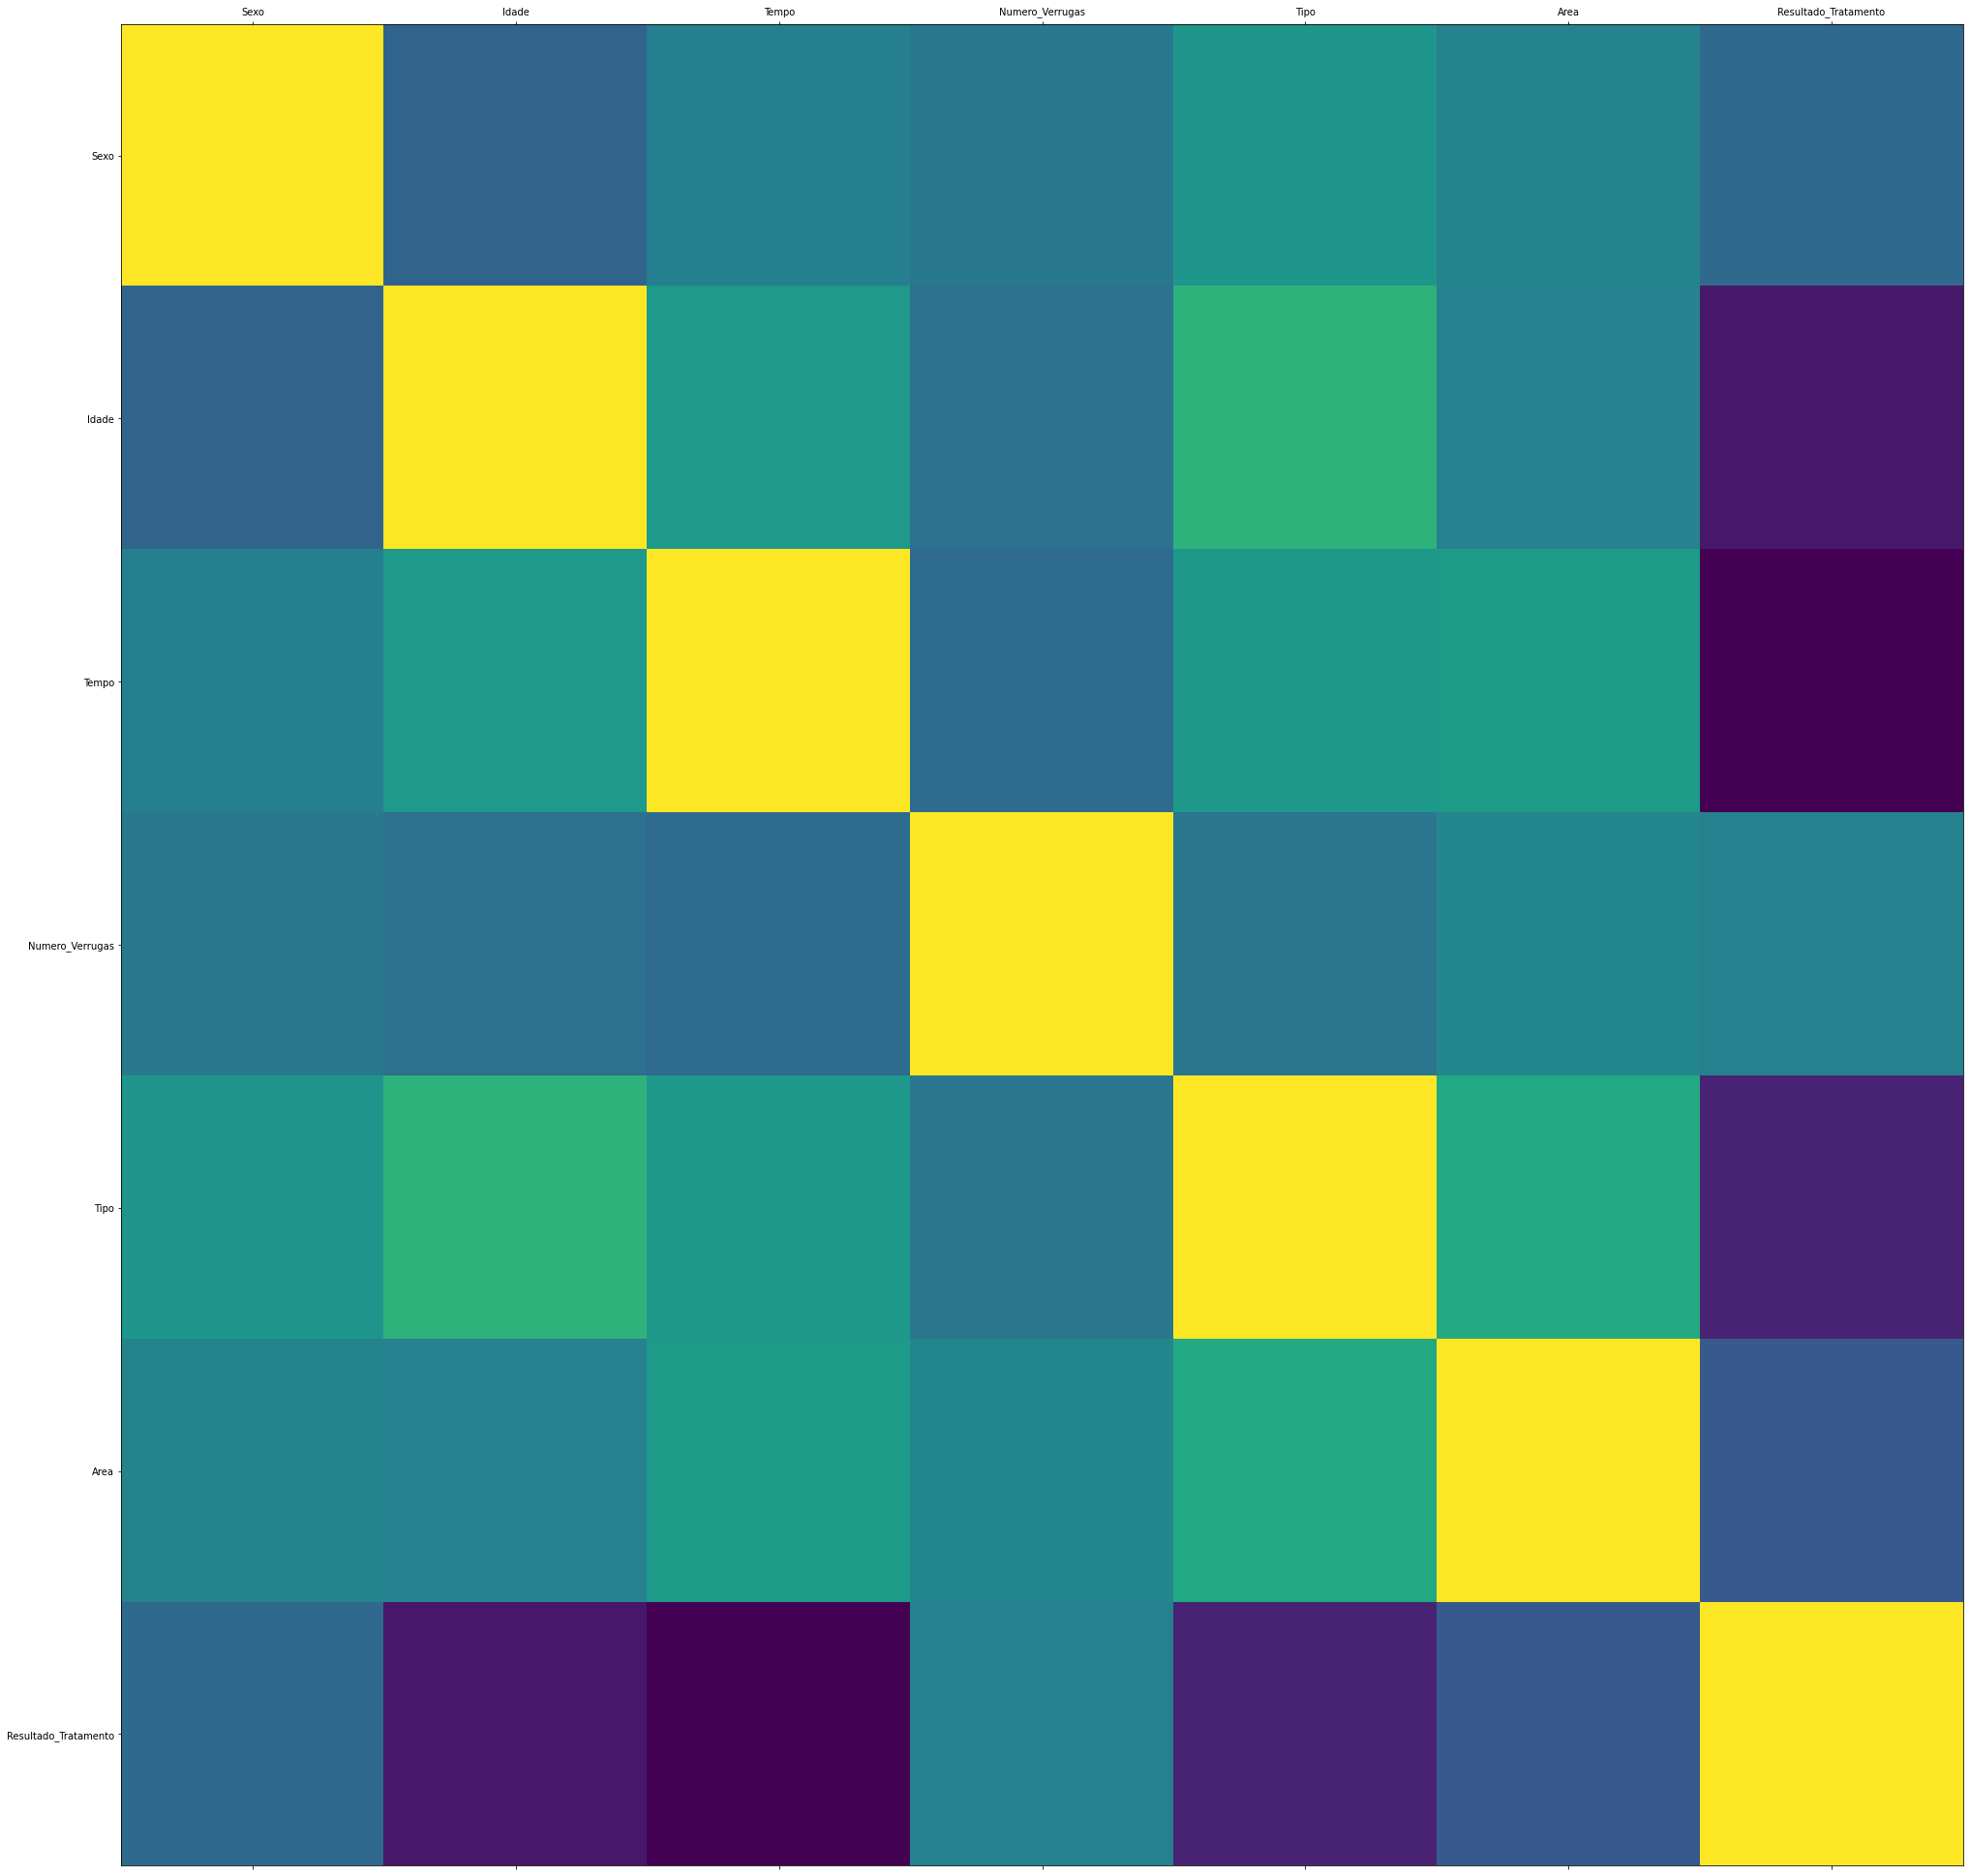

In [10]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_crioterapia_treino)

In [11]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [12]:
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [13]:
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  1  18   4   1   1  80]
 [  2  19   8   9   1 160]
 [  2  50   9   4   3 132]
 [  1  41   8   2   2  20]
 [  1  24  10  10   1  20]
 [  1  50   8  11   3 132]
 [  2  40   8   6   2  80]
 [  1  29   7   6   1  96]
 [  2  32  12   4   3 750]
 [  1  20   3  11   1  75]
 [  1  15   5   5   1   6]
 [  2  18   4   8   1  80]
 [  1  15  10  11   1  30]
 [  1  59   3   3   3  20]
 [  1  67  10   7   1  42]
 [  2  21  10   5   1  35]
 [  2  21  10   7   1  35]
 [  1  29  11   5   1  96]
 [  1  35  12   5   1 100]
 [  1  40  11   9   2  80]
 [  1  27  10   7   1   6]
 [  2  30   1   8   3 115]
 [  1  63   2   3   3  20]
 [  1  17   5  10   1  63]
 [  2  28   5   9   1 100]
 [  2  34  12   3   3  95]
 [  2  32  12  12   3 750]
 [  2  15   2   3   1   4]
 [  2  41   7   5   2  20]
 [  1  67   9   1   1  42]
 [  2  15   2  10   3  70]
 [  2  16   8   1   2  60]
 [  2  15   3   2   3  70]
 [  2  35   8   6   3 100]
 [  2  23   9   5   3  72]
 [  1  

In [14]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [15]:
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [16]:
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8253968253968254
Na Base de Treinamento


In [17]:
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.9259259259259259
na Base de Teste


In [18]:
joblib.dump(modelo_NB, 'modelo_crioterapia_MNB.pkl')

['modelo_crioterapia_MNB.pkl']